# REFINITIV COMPANY TEAR SHEET

### Instructions

Please input a valid RIC after running the first cell below. Then you can run the rest of the notebook using shift+enter for each cell sequentially. 

This notebook will provide all of the information contained in the popular Eikon/Workspace template of the same name. This includes descriptive, consensus recommendations, consensus estimates, valuation ratios and metrics, abbreviated fundamentals, performance review, profitability and some stockprice charts.

In [46]:
RIC = input()
# print(RIC)

 MSFT.O


In [47]:
# Import module and set up with App Key
import refinitiv.data as rd
import pandas as pd
import numpy as np
import plotly.offline as pyof
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime
from datetime import datetime
from datetime import timedelta
rd.open_session()

<refinitiv.data.session.Definition object at 0x178875c70 {name='workspace'}>

In [48]:
# Request Header Information for RIC
df = rd.get_data(
    RIC, "TR.CommonName(),TR.HeadquartersCountry,TR.TRBCIndustryGroup,TR.GICSSector,TR.CompanyMarketCap.Currency")

# Request Exchange for Primary Quote RIC
df_2 = rd.get_data(RIC, "TR.PrimaryQuote")
df_3 = rd.get_data(df_2.at[0, 'Primary Quote RIC'], "TR.ExchangeName")
df['Exchange Name'] = [df_3.at[0, 'Exchange Name']]
df

,Instrument,Company Common Name,Country of Headquarters,TRBC Industry Group Name,GICS Sector Name,Currency,Exchange Name
0,MSFT.O,Microsoft Corp,United States of America,Software & IT Services,Information Technology,USD,NASDAQ/NGS (GLOBAL SELECT MARKET)


## General Information

In [49]:
# As single Dataframe - example only
# df_gen_single = rd.get_data(RIC,
#        [{'TR.PriceClose;TR.Price52WeekHigh;TR.PricePctChg52WkHigh;TR.Price52WeekLow;TR.PricePctChg52WkLow;TR.PriceTargetMedian': {'Curn':df.at[0,'Currency']}},
#            {'TR.BetaFiveYear;TR.DividendYield;TR.SharesOutstanding;TR.FreeFloat;TR.FreeFloatPct();TR.CompanyMarketCap;TR.EV': {'Scale':6,'Curn':df.at[0,'Currency']}}])

# As two Dataframes - more convenient
df_gen = rd.get_data(RIC, 'TR.PriceClose;TR.Price52WeekHigh;TR.PricePctChg52WkHigh;TR.Price52WeekLow;TR.PricePctChg52WkLow;TR.PriceTargetMedian', {
                    'Curn': df.at[0, 'Currency']})
df_gen2 = rd.get_data(RIC, 'TR.BetaFiveYear;TR.DividendYield;TR.SharesOutstanding;TR.FreeFloat;TR.FreeFloatPct();TR.CompanyMarketCap;TR.EV', {
                     'Scale': 6, 'Curn': df.at[0, 'Currency']})

# calc implied profit
df_gen['Implied Profit'] = (
    df_gen.at[0, 'Price Target - Median']/df_gen.at[0, 'Price Close'] - 1)*100

# results as simple lists
list_gen_names = df_gen.columns.tolist()
list_gen = df_gen.iloc[0].tolist()
list_gen2_names = df_gen2.columns.tolist()
list_gen2 = df_gen2.iloc[0].tolist()

# remove RIC
list_gen_names.pop(0)
list_gen.pop(0)
list_gen2_names.pop(0)
list_gen2.pop(0)

data_dict_gen = {'1': list_gen_names, '2': list_gen,
               '3': list_gen2_names, '4': list_gen2}
df_genX = pd.DataFrame(data_dict_gen)

df_genX

,1,2,3,4
0,Price Close,256.870000,Beta 5 Year,9.121267e-01
1,Price 52 Week High,315.950000,Dividend yield,1.065455e+00
2,52-week High Price PCT Change,-18.699161,Outstanding Shares,7.443804e+03
3,Price 52 Week Low,213.431000,Free Float,7.438102e+03
4,52-week Low Price PCT Change,20.352714,Free Float (Percent),9.992340e+01
5,Price Target - Median,285.000000,Company Market Cap,1.912090e+06
6,Implied Profit,10.951065,Enterprise Value (Daily Time Series),1.876282e+06


## Consensus Recommendation

In [50]:
df6 = rd.get_data(RIC, 'TR.RecLabel();TR.NumOfRecommendations();TR.NumEstRevisingUp;TR.NumEstRevisingDown', {
                  'WP': '30d', 'EstimateMeasure': 'EPS'})
df6

,Instrument,Recommendation - Mean Label,Recommendation - Number Of Total,Number of Analysts Revising Up,Number of Analysts Revising Down
0,MSFT.O,BUY,54,4,3


## Estimates

In [51]:
#Retrieve Estimates into Data Frames per Period

#FY0
df_FY0 = rd.get_data(RIC, 'TR.RevenueActValue;TR.EBITDAActValue;TR.EPSActValue',
                       {'Period':'FY0', 'Scale':'6', 'Curn':df.at[0,'Currency']})
#FY1
df_FY1 = rd.get_data(RIC,
'TR.RevenueMeanEstimate;TR.RevenueHigh;TR.RevenueLow;TR.EBITDAMean;TR.EBITDAHigh;TR.EBITDALow;TR.EPSMeanEstimate;TR.EPSHigh;TR.EPSLow',
                       {'Period':'FY1', 'scale':'6', 'curn':df.at[0,'Currency']})
df_FY1_2 = rd.get_data(RIC,
                           'TR.RevenueMeanEstimate; TR.EBITDAMean; TR.EPSMeanEstimate',
    {'Period':'FY1','RollPeriods':'false','Scale': 6,'Curn':df.at[0,'Currency'],'SDate':'-1AM'})
#FY2
df_FY2 = rd.get_data(RIC, 
'TR.RevenueMeanEstimate;TR.RevenueHigh;TR.RevenueLow;TR.EBITDAMean;TR.EBITDAHigh;TR.EBITDALow;TR.EPSMeanEstimate;TR.EPSHigh;TR.EPSLow',
                       {'Period':'FY2', 'scale':'6', 'curn':df.at[0,'Currency']})
df_FY2_2 = rd.get_data(RIC, 'TR.RevenueMeanEstimate;TR.EBITDAMean;TR.EPSMeanEstimate',
    {'Period':'FY2','RollPeriods':'false','Scale': 6,'Curn':df.at[0,'Currency'],'SDate':'-1AM'})

### DEBUG display(df_FY0,df_FY1,df_FY1_2, df_FY2, df_FY2_2)

In [52]:
#Create a dictionary out of results, and structure a single multi-row Data Frame

# initialise results per column 
data = {'Sales (MIL) Mean EST':
        [df_FY0.at[0,'Revenue - Actual'], df_FY1.at[0,'Revenue - Mean Estimate'],'',df_FY2.at[0,'Revenue - Mean Estimate'],''],
       'High Est':
       ['',df_FY1.at[0,'Revenue - High'],(df_FY1.at[0,'Revenue - High']/df_FY1.at[0,'Revenue - Mean Estimate']-1)*100,
        df_FY2.at[0,'Revenue - High'],(df_FY2.at[0,'Revenue - High']/df_FY2.at[0,'Revenue - Mean Estimate']-1)*100],
       'Low Est':
       ['',df_FY1.at[0,'Revenue - Low'],(df_FY1.at[0,'Revenue - Low']/df_FY1.at[0,'Revenue - Mean Estimate']-1)*100,
        df_FY2.at[0,'Revenue - Low'],(df_FY2.at[0,'Revenue - Low']/df_FY2.at[0,'Revenue - Mean Estimate']-1)*100],
       'Est. 30 30 Days Ago':
       ['',df_FY1_2.at[0,'Revenue - Mean Estimate'],(df_FY1_2.at[0,'Revenue - Mean Estimate']/df_FY1.at[0,'Revenue - Mean Estimate']-1)*100,
        df_FY2_2.at[0,'Revenue - Mean Estimate'],(df_FY2_2.at[0,'Revenue - Mean Estimate']/df_FY2.at[0,'Revenue - Mean Estimate']-1)*100],
       'EBITDA (MIL) Mean Est.':
        [df_FY0.at[0,'EBITDA - Actual'],df_FY1.at[0,'EBITDA - Mean'],'',df_FY2.at[0,'EBITDA - Mean'],''],
        'High Est.':
        ['',df_FY1.at[0,'EBITDA - High'],(df_FY1.at[0,'EBITDA - High']/df_FY1.at[0,'EBITDA - Mean']-1)*100,
         df_FY2.at[0,'EBITDA - High'],(df_FY2.at[0,'EBITDA - High']/df_FY2.at[0,'EBITDA - Mean']-1)*100],
        'Low Est.':
        ['',df_FY1.at[0,'EBITDA - Low'],(df_FY1.at[0,'EBITDA - Low']/df_FY1.at[0,'EBITDA - Mean']-1)*100,
         df_FY2.at[0,'EBITDA - Low'],(df_FY2.at[0,'EBITDA - Low']/df_FY2.at[0,'EBITDA - Mean']-1)*100],
        'Est. 30 30 Days Ago.':
       ['',df_FY1_2.at[0,'EBITDA - Mean'],(df_FY1_2.at[0,'EBITDA - Mean']/df_FY1.at[0,'EBITDA - Mean']-1)*100,
        df_FY2_2.at[0,'EBITDA - Mean'],(df_FY2_2.at[0,'EBITDA - Mean']/df_FY2.at[0,'EBITDA - Mean']-1)*100],
        'EPS Mean Est.':
        [df_FY0.at[0,'Earnings Per Share - Actual'], df_FY1.at[0,'Earnings Per Share - Mean Estimate'],'',
         df_FY2.at[0,'Earnings Per Share - Mean Estimate'],''],
        'High Est..':
         ['',df_FY1.at[0,'Earnings Per Share - High'],(df_FY1.at[0,'Earnings Per Share - High']/df_FY1.at[0,'Earnings Per Share - Mean Estimate']-1)*100,
        df_FY2.at[0,'Earnings Per Share - High'],(df_FY2.at[0,'Earnings Per Share - High']/df_FY2.at[0,'Earnings Per Share - Mean Estimate']-1)*100],
        'Low Est..':
         ['',df_FY1.at[0,'Earnings Per Share - Low'],(df_FY1.at[0,'Earnings Per Share - Low']/df_FY1.at[0,'Earnings Per Share - Mean Estimate']-1)*100,
        df_FY2.at[0,'Earnings Per Share - Low'],(df_FY2.at[0,'Earnings Per Share - Low']/df_FY2.at[0,'Earnings Per Share - Mean Estimate']-1)*100],
        'Est. 30 30 Days Ago..':
        ['',df_FY1_2.at[0,'Earnings Per Share - Mean Estimate'],(df_FY1_2.at[0,'Earnings Per Share - Mean Estimate']/df_FY1.at[0,'Earnings Per Share - Mean Estimate']-1)*100,
        df_FY2_2.at[0,'Earnings Per Share - Mean Estimate'],(df_FY2_2.at[0,'Earnings Per Share - Mean Estimate']/df_FY2.at[0,'Earnings Per Share - Mean Estimate']-1)*100]
       }  
  
# Create Pandas DataFrame. 
df_multi_row = pd.DataFrame(data, index =['FY0 (Actual)','FY1 (Current Year)', '% above/below mean','FY2 (Next Year)','% above/below mean' ]) 
                                             
df_multi_row                     

,Sales (MIL) Mean EST,High Est,Low Est,Est. 30 30 Days Ago,EBITDA (MIL) Mean Est.,High Est.,Low Est.,Est. 30 30 Days Ago.,EPS Mean Est.,High Est..,Low Est..,Est. 30 30 Days Ago..
FY0 (Actual),198270,,,,97843,,,,9.21,,,
FY1 (Current Year),208894.16815,211988,206056,208916.49125,99669.99016,104454,96922,99701.21305,9.3597,9.72,9.02,9.35952
% above/below mean,,1.481052,-1.358663,0.010686,,4.79985,-2.757089,0.031326,,3.849482,-3.62939,-0.001923
FY2 (Next Year),231876.3797,241411,215371,231593.87574,114853.68595,121360.338,103796,114739.12055,10.74602,11.75,9.66,10.73265
% above/below mean,,4.111941,-7.118181,-0.121834,,5.665166,-9.627628,-0.099749,,9.342808,-10.106253,-0.124418


# Valuation Ratios

In [53]:
# Retrieve Valuation Ratios into DataFrames per period

df_LTM = rd.get_data(
    RIC, 'TR.PE;TR.PriceToSalesPerShare;TR.EVToSales;TR.EVToEBITDA', {'Sdate': '0D'})
df_FY1 = rd.get_data(
    RIC, 'TR.PToEPSMeanEst;TR.PToREVMeanEst', {'Period': 'FY1'})
df_FY1_2 = rd.get_data(RIC, 'TR.EV;TR.RevenueMeanEstimate,TR.EBITDAMean', {
                      'Period': 'FY1', 'Curn': df.at[0, 'Currency']})
df_FY2 = rd.get_data(
    RIC, 'TR.PToEPSMeanEst;TR.PToREVMeanEst', {'Period': 'FY2'})
df_FY2_2 = rd.get_data(RIC, 'TR.EV;TR.RevenueMeanEstimate,TR.EBITDAMean', {
                      'Period': 'FY2', 'Curn': df.at[0, 'Currency']})
# DEBUG display(df_LTM,df_FY1,df_FY1_2,df_FY2, df_FY2_2)

In [54]:
# Create a dictionary out of results, and structure a single multi-row Data Frame

# Initialise results per column
data_dict = {'P/E':
            [df_LTM.at[0, 'P/E (Daily Time Series Ratio)'], df_FY1.at[0,
                                                                    'Price / EPS (Mean Estimate)'], df_FY2.at[0, 'Price / EPS (Mean Estimate)']],
            'P/SALES':
            [df_LTM.at[0, 'Price To Sales Per Share (Daily Time Series Ratio)'], df_FY1.at[0,
                                                                                         'Price / Revenue (Mean Estimate)'], df_FY2.at[0, 'Price / Revenue (Mean Estimate)']],
            'EV/REVS':
            [df_LTM.at[0, 'Enterprise Value To Sales (Daily Time Series Ratio)'],
                df_FY1_2.at[0, 'Enterprise Value (Daily Time Series)'] /
             df_FY1_2.at[0, 'Revenue - Mean Estimate'],
                df_FY2_2.at[0, 'Enterprise Value (Daily Time Series)']/df_FY2_2.at[0, 'Revenue - Mean Estimate']],

            'EV/EBITDA':
            [df_LTM.at[0, 'Enterprise Value To EBITDA (Daily Time Series Ratio)'],
                df_FY1_2.at[0, 'Enterprise Value (Daily Time Series)'] /
                df_FY1_2.at[0, 'EBITDA - Mean'],
                df_FY2_2.at[0, 'Enterprise Value (Daily Time Series)']/df_FY2_2.at[0, 'EBITDA - Mean']]
            }

# Create Pandas DataFrame.
df_multi_row = pd.DataFrame(data_dict, index=[
                          'LTM (Last Twelve Months)', 'FY1 (Current Year)', 'FY2 (Next Year)'])
df_multi_row

,P/E,P/SALES,EV/REVS,EV/EBITDA
LTM (Last Twelve Months),28.558437,9.368672,9.193224,19.342114
FY1 (Current Year),27.444256,9.153390,8.981973,18.824942
FY2 (Next Year),23.903734,8.246160,8.091733,16.336279


## FY0 Per Share Metrics 

In [55]:
df_FYO_share = rd.get_data(RIC, ['TR.TotCashAndShortTermInvestmentsperShare',
                               'TR.WorkingCapitalperShare', 'BookValuePerShare', 'TR.RevenuePerShare', 'TR.CashFlowtoShrdil',
                               'TR.FreeOperatingCashFlowperShareAvgDilutedSharesOut', 'TR.DPSCommonStock'], {'Period': 'FY0', 'curn': df.at[0, 'Currency']})
df_FYO_share_2 = rd.get_data(RIC, ['TR.TotalDebt', 'TR.TtlCmnSharesOut'], {
                           'Period': 'FY0', 'curn': df.at[0, 'Currency']})
# additionally, calculate total debt
df_FYO_share['Total Debt'] = [df_FYO_share_2.at[0, 'Total Debt'] /
                            df_FYO_share_2.at[0, 'Total Common Shares Outstanding']]
df_FYO_share

,Instrument,Total Cash & ST Invest/Share,Wk Cap/Shr,Revenue Per Share,Cash Flow/Shr (dil.),FOCF/Shr (dil.),DPS - Common Stock Primary Issue,Total Debt
0,MSFT.O,14.0349678457,9.994908896,26.2957559682,11.5832891247,6.2352785146,2.42,8.665997


## FY0 Employee Data

In [56]:
df_emp = rd.get_data(
    RIC, 'TR.Employees(Period=FY0),TR.RevenueperEmployeescalYrEnd(Period=FY0)')
df_emp_2 = rd.get_data(RIC, 'TR.Employees(Period=FY-1)')
df_emp_3 = rd.get_data(
    RIC, 'TR.RevenueperEmployeescalYrEnd(Period=FY0,sdate=0D,Edate=-4FY,Frq=FY)')
df_emp['Empt Grth'] = (df_emp_2.at[0, 'Full-Time Employees']-df_emp.at[0,
                      'Full-Time Employees'])/df_emp_2.at[0, 'Full-Time Employees']
df_emp['5 yr Avg'] = df_emp_3["Revenue/Employee, FY"].mean()
df_emp

,Instrument,Full-Time Employees,"Revenue/Employee, FY",Empt Grth,5 yr Avg
0,MSFT.O,221000,986417.910448,-0.220994,935231.596222


## Abbreviated Financials

### Income Statement (MIL)

In [57]:
df_fin = rd.get_data(RIC, 'TR.TotalRevenue;TR.GrossProfit;TR.EBITDA;TR.EBIT;TR.NetIncomeBeforeTaxes;TR.NetIncome;TR.TtlCmnSharesOut', {
                    'Period': 'FY0', 'Scale': '6', 'curn': df.at[0, 'Currency']})
df_fin2 = rd.get_data(RIC, 'TR.TotalRevenue;TR.GrossProfit;TR.EBITDA;TR.EBIT;TR.NetIncomeBeforeTaxes;TR.NetIncome;TR.TtlCmnSharesOut', {
                     'Period': 'FY-1', 'Scale': '6', 'curn': df.at[0, 'Currency']})

# results as simple lists
list_fin = df_fin.iloc[0].tolist()  # select row 0, all columns
list_fin2 = df_fin2.iloc[0].tolist()

# results as single dictionary
data_dict2 = {'FY0': list_fin, 'FY-1': list_fin2}

# Pandas DataFrame from dictionary
df_income = pd.DataFrame(data_dict2, index=df_fin.columns)
df_income

,FY0,FY-1
Instrument,MSFT.O,MSFT.O
Total Revenue,198270,168088
Gross Profit,135620,115856
EBITDA,97983,81602.0
EBIT,83383,69916
Net Income Before Taxes,83716,71102
Net Income Incl Extra Before Distributions,72738,61271
Total Common Shares Outstanding,7464,7519


### Balance Sheet (MIL)

In [58]:
df_bal = rd.get_data(RIC, 'TR.CashAndSTInvestments;TR.PropertyPlantEquipmentTotalNet;TR.TotalAssetsReported;TR.CurrentLiabilities;TR.TotalLongTermDebt;TR.TotalLiabilities;TR.TotalEquity', {
                    'Period': 'FY0', 'Scale': 6, 'Curn': df.at[0, 'Currency']})
df_bal2 = rd.get_data(RIC, 'TR.CashAndSTInvestments;TR.PropertyPlantEquipmentTotalNet;TR.TotalAssetsReported;TR.CurrentLiabilities;TR.TotalLongTermDebt;TR.TotalLiabilities;TR.TotalEquity', {
                     'Period': 'FY-1', 'Scale': 6, 'Curn': df.at[0, 'Currency']})

# results as single dictionary
data_dict3 = {'FY0': list(df_bal.iloc[0, :]), 'FY-1': list(df_bal2.iloc[0, :])}

# Pandas DataFrame from dictionary
df_balance = pd.DataFrame(data_dict3, index=df_bal.columns)
df_balance

,FY0,FY-1
Instrument,MSFT.O,MSFT.O
Cash and Short Term Investments,104757,130334
"Property/Plant/Equipment, Total - Net",87546,70803
"Total Assets, Reported",364840,333779
Current Liabilities,95082,88657
Total Long Term Debt,60874,61824
Total Liabilities,198298,191791
Total Equity,166542,141988


### Cash Flow Statement (MIL)

In [59]:
df_cash = rd.get_data(RIC, 'TR.NetIncomeStartingLine', {
                     'Period': 'FY0', 'Scale': '6', 'curn': df.at[0, 'Currency']})
df_cash_2 = rd.get_data(RIC, 'TR.NetIncomeStartingLine,TR.DepreciationDepletion,TR.Amortization,TR.NonCashItems,TR.DeferredTaxes', {
                       'Period': 'FY0', 'Scale': '6', 'Curn': df.at[0, 'Currency']}).dropna(axis=0)
df_cash_3 = rd.get_data(RIC, 'TR.CashFromOperatingAct;TR.CapitalExpenditures;TR.CashFromInvestingAct;TR.CashDividendsPaid*-1;TR.CashFromFinancingAct',
                       {'Period': 'FY0', 'Scale': 6, 'Curn': df.at[0, 'Currency']})
# insert as columns, entincome and  sum of cash from operations
df_cash_3['Net Income'] = [df_cash.at[0, 'Net Income/Starting Line, Cumulative']]
df_cash_3['Cash From Operations'] = [
    sum(list(filter(None, df_cash_2.iloc[0, 1:])))]

df_cash2 = rd.get_data(RIC, 'TR.NetIncomeStartingLine', {
                      'Period': 'FY-1', 'Scale': '6', 'curn': df.at[0, 'Currency']})
df_cash2_2 = rd.get_data(RIC, 'TR.NetIncomeStartingLine,TR.DepreciationDepletion,TR.Amortization,TR.NonCashItems,TR.DeferredTaxes', {
                        'Period': 'FY-1', 'Scale': '6', 'Curn': df.at[0, 'Currency']})
df_cash2_3 = rd.get_data(RIC, 'TR.CashFromOperatingAct;TR.CapitalExpenditures;TR.CashFromInvestingAct;TR.CashDividendsPaid*-1;TR.CashFromFinancingAct',
                        {'Period': 'FY-1', 'Scale': 6, 'Curn': df.at[0, 'Currency']})
# insert as columns, entincome and  sum of cash from operations
df_cash2_3['Net Income'] = [
    df_cash2.at[0, 'Net Income/Starting Line, Cumulative']]
df_cash2_3['Cash From Operations'] = [
    sum(list(filter(None, df_cash2_2.iloc[0, 1:])))]

# DEBUG display(df_cash_3,df_cash2_3)

# results as simple lists
list_cash = df_cash_3.iloc[0, :].tolist()
list_cash2 = df_cash2_3.iloc[0, :].tolist()


# results as single dictionary
data_dict3 = {'FY0': list_cash, 'FY-1': list_cash2}
# data_dict3

# Pandas DataFrame from dictionary
df_cash_flow = pd.DataFrame(data_dict3, index=df_cash_3.columns)
df_cash_flow

,FY0,FY-1
Instrument,MSFT.O,MSFT.O
"Cash from Operating Activities, Cumulative",89035,76740
"Capital Expenditures, Cumulative",-23886,-20622
"Cash from Investing Activities, Cumulative",-30311,-27577
TR.CASHDIVIDENDSPAID*-1,-18135,-16521
"Cash from Financing Activities, Cumulative",-58876,-48486
Net Income,72738,61271
Cash From Operations,88589,77676


## Review of Stock Performance 

### Price Actions

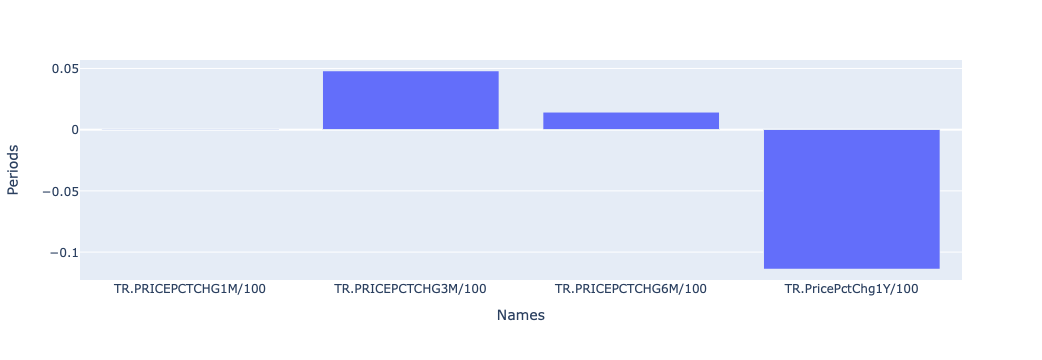

In [60]:
# retrieve percentage changes

df_price_actions = rd.get_data(
    RIC, 'TR.PricePctChg1M/100;TR.PricePctChg3M/100;TR.PricePctChg6M/100;TR.PricePctChg1Y/100')
df_price_actions

# create lists out of results
list_names = df_price_actions.columns.tolist()
list_PA = df_price_actions.iloc[0, :].tolist()

# remove the first element, it's header
list_names.pop(0)
list_PA.pop(0)
#display(list_names, list_PA)

# Pandas DataFrame from dictionary
data_dict_PA = {'Names': list_names, 'Periods': list_PA}
df_PA = pd.DataFrame(data_dict_PA, index=list_names)


pyof.init_notebook_mode(connected=True)

fig = px.bar(df_PA, x='Names', y='Periods')
fig.show()

### Profitability 

In [62]:
df_profit = rd.get_data(RIC,
                        'TR.GrossMargin;TR.ResearchAndDevelopment;TR.TotalRevenue;TR.SGAExpenseTotal;TR.EBITDAMarginPercent;TR.OperProfitMarginPct;TR.PretaxMarginPercent;TR.NetProfitMargin;TR.CashFlowMarginPercent/100;TR.IncomeTaxRatePct;TR.ROATotalAssetsPercent;TR.ReturnonAvgTotEqtyPctNetIncomeBeforeExtraItems', {'Period': 'FY0'}).replace(np.nan,'',regex=True)
df_profit2 = rd.get_data(RIC,
                        'TR.GrossProfitMarginPct5YrAvg();TR.EBITDAMarginPct5YrAvg;TR.OperatingProfitMarginPct5YrAvg;TR.IncomeBefTaxMarginpct5YrAvg();TR.IncomeAftTaxMarginpct5YrAvg();TR.CashFlowMarginPct5YrAvg()/100;TR.IncomeTaxRatePct5YrAvg()/100;TR.ReturnonAvgTotAssetsPctIncomeAfterTax5YrAvg').replace(np.nan,'',regex=True)
df_profit3 = rd.get_data(RIC, 'TR.ResearchAndDevelopment(),TR.TotalRevenue(),TR.SGAExpenseTotal,TR.ReturnonAvgTotEqtyPctNetIncomeBeforeExtraItems', {
                        'Period': 'FY0', 'Sdate': 0, 'Edate': -4, 'Frq': 'FY'})
df_profit3['RAD over TR'] = df_profit3['Research And Development'] / \
    df_profit3['Total Revenue']
df_profit3['SGA over TR'] = df_profit3['Selling/General/Administrative Expense, Total'] / \
    df_profit3['Total Revenue']

# Create a dictionary out of results, and structure a single multi-row Data Frame
# initialise results per column
data_dict_profit = {'FY0':
                  [df_profit.at[0, 'Gross Margin, Percent'],  df_profit.at[0, 'Research And Development']/df_profit.at[0, 'Total Revenue'],
                   df_profit.at[0, 'Selling/General/Administrative Expense, Total'] /
                   df_profit.at[0, 'Total Revenue'],
                   df_profit.at[0, 'EBITDA Margin, Percent'], df_profit.at[0,
                                                                         'Operating Profit Margin, Percent'],
                   df_profit.at[0, 'Pretax Margin, Percent'], df_profit.at[0,
                                                                         'Net Profit Margin, (%)'],
                   df_profit.at[0, 'TR.CASHFLOWMARGINPERCENT/100'], df_profit.at[0,
                                                                               'Income Tax Rate, %'],
                   df_profit.at[0, 'ROA Total Assets, Percent'], df_profit.at[0,
                                                                            'ROE Total Equity %']
                   ], '5 Year Avg': [df_profit2.at[0, 'Gross Profit Margin, %, 5 Yr Avg'], df_profit3['RAD over TR'].mean(),
                                     df_profit3['SGA over TR'].mean(
                   ), df_profit2.at[0, 'EBITDA Margin, %, 5 Yr Avg'],
                      df_profit2.at[0, 'Oper Profit Margin, %, 5 Yr Avg'], df_profit2.at[0,
                                                                                       'Income Bef Tax Margin, %, 5 Yr Avg'],
                      df_profit2.at[0, 'Income Aft Tax Margin, %, 5 Yr Avg'], df_profit2.at[0,
                                                                                          'TR.CASHFLOWMARGINPCT5YRAVG()/100'],
                      df_profit2.at[0, 'TR.INCOMETAXRATEPCT5YRAVG()/100'], df_profit2.at[0,
                                                                                       'ROA Tot Assets, %, 5 Yr Avg'],
                      df_profit3['ROE Total Equity %'].mean()
                  ]

                  }
# data_dict_profit

# structure as required multi-row
df_multi_profit = pd.DataFrame(data_dict_profit, index=[
    'Gross Margin', 'R/D % Sales', 'SGA % Sales', 'EBITDA Margin', 'Operating Margin', 'Pretax Margin', 'Net Margin',
    'CF/Sales', 'Tax Rate', 'ROA', 'ROE'
])
df_multi_profit

,FY0,5 Year Avg
Gross Margin,68.401670,67.511964
R/D % Sales,0.123629,0.129830
SGA % Sales,0.139835,0.169517
EBITDA Margin,49.418974,46.376761
Operating Margin,42.004338,38.085319
Pretax Margin,42.223230,38.629999
Net Margin,36.686340,33.257240
CF/Sales,0.440500,0.414808
Tax Rate,13.113383,0.139083
ROA,20.823367,16.663060


### FY0 Sales By Region 

In [63]:
df_sales_by_region = rd.get_data(RIC, 'TR.BGS.GeoTotalRevenue.segmentName;TR.BGS.GeoTotalRevenue()', {
                              'Scale': '6', 'curn': df.at[0, 'Currency']})
df_sales_by_region

,Instrument,Segment Name,Geographic Total Revenues (Calculated)
0,MSFT.O,United States,100218
1,MSFT.O,Other countries,98052
2,MSFT.O,Segment Total,198270
3,MSFT.O,Consolidated Total,198270


## Price Chart

### Pricing Data  - 1 -  Closing Prices

In [64]:
df_pricing_intermediate1 = rd.get_data(RIC, 'TR.PriceClose.date;TR.PriceClose', {
                                     'sdate': '-5AY', 'edate': '0d', 'frq': 'D'})

### Pricing Data - 2 - Dates 

In [65]:
# Intermediate dates to use in the next step
def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += timedelta(days=1)
    return days


RIC2 = 'AAPL.O'

df_dates_AAPL_intermediate1 = rd.get_data(
    RIC2, 'TR.PriceClose.date', {'sdate': '0d'})
df_dates_AAPL_intermediate2 = rd.get_data(
    RIC2, 'TR.PriceClose.date', {'sdate': '-24AM'})

# number of work days between the two dates + 250
days_between = len(workdays((df_dates_AAPL_intermediate2.at[0, 'Date']),
                           (df_dates_AAPL_intermediate1.at[0, 'Date']))) + 250
days_between
df_dates_AAPL_intermediate4 = rd.get_data(RIC2, 'TR.PriceClose.date', {
                                       'sdate': '-'+str(days_between)+'D'})

display(df_dates_AAPL_intermediate1.at[0, 'Date'],
        df_dates_AAPL_intermediate2.at[0, 'Date'],
        df_pricing_intermediate1.at[0, 'Date'],
        df_dates_AAPL_intermediate4.at[0, 'Date'])

if df_pricing_intermediate1.at[0, 'Date'] > df_dates_AAPL_intermediate2.at[0, 'Date']:
    later_date1 = df_pricing_intermediate1.at[0, 'Date'].strftime(
        "%Y-%m-%d, %H:%M:%S")
else:
    later_date1 = df_dates_AAPL_intermediate2.at[0, 'Date'].strftime(
        "%Y-%m-%d, %H:%M:%S")


if df_pricing_intermediate1.at[0, 'Date'] > df_dates_AAPL_intermediate4.at[0, 'Date']:
    later_date2 = df_pricing_intermediate1.at[0, 'Date'].strftime(
        "%Y-%m-%d, %H:%M:%S")
else:
    later_date2 = df_dates_AAPL_intermediate4.at[0, 'Date'].strftime(
        "%Y-%m-%d, %H:%M:%S")

display(later_date1, later_date2)

Timestamp('2023-03-06 00:00:00')

Timestamp('2021-03-05 00:00:00')

Timestamp('2018-03-07 00:00:00')

Timestamp('2020-02-10 00:00:00')

'2021-03-05, 00:00:00'

'2020-02-10, 00:00:00'

### Pricing Data - 3 - Volumes, Prices, 50 days, 200 days 

In [66]:
df_dt_vol_price = rd.get_data(df_2.at[0, 'Primary Quote RIC'], 'TR.PriceClose.CalcDate,TR.PriceClose', {
                           'Sdate': '0D', 'Edate': later_date2[:10], 'Frq': 'D'})
df_dt_vol_price2 = rd.get_data(df_2.at[0, 'Primary Quote RIC'], 'TR.Volume', {
                            'Sdate': '0D', 'Edate': later_date2[:10], 'Frq': 'D', 'Scale': 3})
df_dt_vol_price['Volume'] = df_dt_vol_price2['Volume']

# calculate moving averages
convolve50 = np.convolve(
    df_dt_vol_price['Price Close'], np.ones((50,))/50, mode='valid')
convolve200 = np.convolve(
    df_dt_vol_price['Price Close'], np.ones((200,))/200, mode='valid')
display(df_dt_vol_price, convolve50, convolve200)

,Instrument,Calc Date,Price Close,Volume
0,MSFT.OQ,2023-03-06,256.87,8293.202
1,MSFT.OQ,2023-03-03,255.29,10114.869
2,MSFT.OQ,2023-03-02,251.11,9051.826
3,MSFT.OQ,2023-03-01,246.27,9263.9
4,MSFT.OQ,2023-02-28,249.42,7390.43
...,...,...,...,...
768,MSFT.OQ,2020-02-14,185.35,7583.823
769,MSFT.OQ,2020-02-13,183.71,9519.806
770,MSFT.OQ,2020-02-12,184.71,13971.22
771,MSFT.OQ,2020-02-11,184.44,13044.325


array([247.2615999999999, 246.96019999999993, 246.66339999999994,
       246.53499999999994, 246.58979999999994, 246.74579999999995,
       246.88099999999997, 246.94679999999994, 246.75979999999993,
       246.67759999999996, 246.51159999999996, 246.25279999999998,
       246.01379999999997, 245.7278, 245.3782, 245.0546, 244.5992,
       244.16199999999998, 243.7772, 243.3776, 243.14280000000002,
       242.81680000000003, 242.3492, 242.1278, 242.00619999999998,
       241.9914, 241.8592, 241.84140000000002, 241.8888, 241.5382,
       241.26400000000004, 241.01700000000002, 240.80620000000002,
       240.375, 239.96999999999997, 239.7488, 239.6212,
       239.62319999999997, 239.58119999999997, 239.66519999999997,
       240.1798, 240.6786, 240.93899999999996, 240.8704, 240.8036,
       240.7534, 240.8134, 240.6454, 240.55559999999997,
       240.30679999999995, 239.92639999999994, 239.67539999999994,
       239.55119999999994, 239.59319999999994, 239.59699999999995,
       239.430199

array([252.55360000000007, 252.60335000000012, 252.6344000000001,
       252.68445000000008, 252.72985000000006, 252.78550000000007,
       252.8822000000001, 252.9590000000001, 253.05880000000005,
       253.18800000000007, 253.37455000000008, 253.49315000000007,
       253.60475000000002, 253.64575000000005, 253.73305000000002,
       253.79255000000006, 253.82815000000008, 253.91365000000008,
       253.95015000000004, 254.01640000000003, 254.16435000000007,
       254.29910000000004, 254.37870000000007, 254.51410000000004,
       254.71315, 254.90990000000002, 255.09540000000004,
       255.34025000000003, 255.64405, 255.93135, 256.27285,
       256.64660000000003, 257.03405, 257.39655, 257.7641,
       258.1449999999999, 258.5059499999999, 258.84549999999996,
       259.22175, 259.5836, 259.9792500000001, 260.36350000000004,
       260.72015, 260.99834999999996, 261.2711999999999, 261.5019,
       261.71145, 261.92699999999996, 262.1613000000001,
       262.4128500000001, 262.5699

### Price Chart 

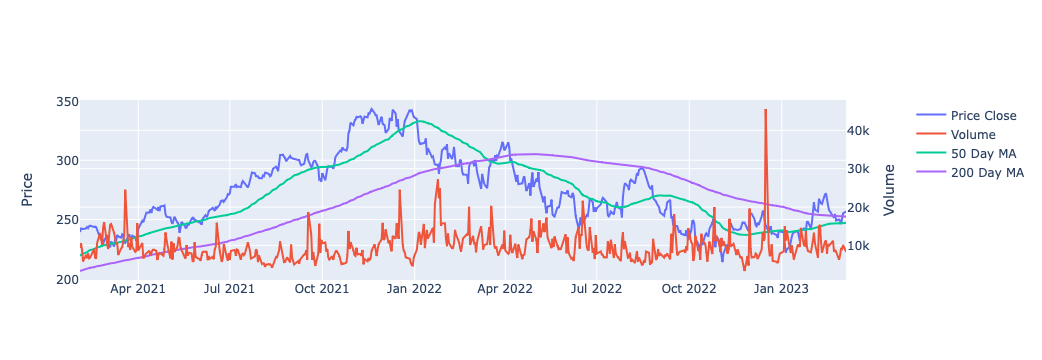

In [67]:
# fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        #       x=df_dt_vol_price['Calc Date'],  #we can optionally chart the complete set
        x=df_dt_vol_price.loc[:525, ['Calc Date']
                           ]['Calc Date'],    # we are cutting off
        y=df_dt_vol_price['Price Close'],
        name='Price Close'),
    secondary_y=False,
)
fig.add_trace(go.Scatter(
    #    x=df_dt_vol_price['Calc Date'],
    x=df_dt_vol_price.loc[:525, ['Calc Date']]['Calc Date'],
    y=df_dt_vol_price['Volume'],
    name='Volume'),
    secondary_y=True,
)
fig.add_trace(go.Scatter(
    #    x=df_dt_vol_price['Calc Date'],
    x=df_dt_vol_price.loc[:525, ['Calc Date']]['Calc Date'],
    y=convolve50,
    name='50 Day MA',),
    secondary_y=False,
)
fig.add_trace(go.Scatter(
    x=df_dt_vol_price.loc[:525, ['Calc Date']]['Calc Date'],
    #    x=df_dt_vol_price['Calc Date'],
    y=convolve200,
    name='200 Day MA',),
    secondary_y=False,
)

fig.update_yaxes(title_text="Price", secondary_y=False)
fig.update_yaxes(title_text="Volume", secondary_y=True)

fig.show()

In [68]:
data = rd.get_data(["IBM", "AAPL.O"], ['TR.PriceClose', 'TR.PriceOpen'])
data

,Instrument,Price Close,Price Open
0,IBM,130.19,129.64
1,AAPL.O,153.83,153.785


In [69]:
df_gen = rd.get_data(RIC,
                    ['TR.PriceClose;TR.Price52WeekHigh;TR.PricePctChg52WkHigh;TR.Price52WeekLow;TR.PricePctChg52WkLow;TR.PriceTargetMedian',
                     'TR.BetaFiveYear;TR.DividendYield;TR.SharesOutstanding;TR.FreeFloat;TR.FreeFloatPct();TR.CompanyMarketCap;TR.EV']
                    )
df_gen

,Instrument,Price Close,Price 52 Week High,52-week High Price PCT Change,Price 52 Week Low,52-week Low Price PCT Change,Price Target - Median,Beta 5 Year,Dividend yield,Outstanding Shares,Free Float,Free Float (Percent),Company Market Cap,Enterprise Value (Daily Time Series)
0,MSFT.O,256.87,315.95,-18.699161,213.431,20.352714,285,0.912127,1.065455,7443803533,7438101717,99.9234,1912089813521.709961,1876281813521.709961


In [70]:
rd.close_session()

**Further Resources for Refinitiv Data Libraries API on Developer Community Portal**

* [Overview](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python) 
* [Quick Start ](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start)
* [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/documentation)
* [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/tutorials)
* [Q&A Forums](https://community.developers.refinitiv.com/spaces/321/index.html)